In [ ]:
import pandas as pd
import pathlib
import os

In [2]:
path = r"E:\Downloads\OSM 事务"

In [15]:
import pandas as pd
import pathlib
import os
import chardet

# --- Setup: Define your directory path ---
# NOTE: Replace 'E:/Downloads/OSM 事务' with the actual path.
path = r'E:\Downloads\OSM 事务' 
# --- End of Setup ---

all_dfs = []
print(f"Reading CSV files from: {path}")

# Define the maximum number of bytes to read for encoding detection
CHUNK_SIZE_FOR_DETECTION = 100000 
COMMON_CHINESE_ENCODING = 'gbk' # A robust standard for Chinese characters

for file in pathlib.Path(path).glob("*.csv"):
    file_name = file.name
    
    # 1. Detect Encoding using chardet
    detected_encoding = 'utf-8' # Default fallback
    
    try:
        # Read a chunk of the file in binary mode ('rb')
        with open(file, 'rb') as f:
            raw_data = f.read(CHUNK_SIZE_FOR_DETECTION)
            
        # Analyze the raw bytes
        result = chardet.detect(raw_data)
        
        # Extract the detected encoding. Use a high confidence threshold.
        if result['confidence'] > 0.7:
             # Standardize detected encoding names
            detected_encoding = result['encoding'].lower()
        
        print(f"-> Detected encoding for {file_name}: {detected_encoding} (Confidence: {result['confidence']:.2f})")

    except Exception as e:
        print(f"-> ⚠️ Warning: Could not detect encoding for {file_name}. Using fallback 'utf-8'. Error: {e}")
        detected_encoding = 'utf-8' # Fallback to utf-8 if detection fails


    # 2. Read the CSV using the detected/fallback encoding
    try:
        df = pd.read_csv(file, encoding=detected_encoding)
        print(f"-> ✅ Successfully read: {file_name} using {detected_encoding}")
        all_dfs.append(df)

    except UnicodeDecodeError:
        # Fallback 1: Try the robust Chinese encoding 'gb18030'
        try:
            df = pd.read_csv(file, encoding=COMMON_CHINESE_ENCODING)
            all_dfs.append(df)
            print(f"-> ✅ Successfully read (used '{COMMON_CHINESE_ENCODING}' fallback): {file_name}")

        except UnicodeDecodeError:
            # Fallback 2: Try 'latin1' for non-Unicode/European files that might have been misclassified
            try:
                df = pd.read_csv(file, encoding='latin1')
                all_dfs.append(df)
                print(f"-> ✅ Successfully read (used 'latin1' fallback): {file_name}")
            except Exception as e:
                # Final failure handling for reading the file
                print(f"-> ❌ FINAL FAILURE: Could not read {file_name} after all attempts. Skipping file. Error: {e}")
                continue # Skip to the next file
    
    except Exception as e:
        # Handle other pd.read_csv errors (e.g., incorrect separator)
        print(f"-> ❌ Failed to read {file_name} due to a structural error. Skipping file. Error: {e}")
        continue


# --- 3. Concatenation and Saving ---

if all_dfs:
    print("\nConcatenating all successfully read DataFrames...")
    big_df = pd.concat(all_dfs, ignore_index=True)

    output_file_name = "combined.csv"
    output_path = os.path.join(path, output_file_name)
    
    # Save the combined DataFrame, ensuring the output uses a universal encoding (UTF-8)
    big_df.to_csv(output_path, index=False, encoding='utf-8')
    
    print(f"\n✅ Successfully created and saved the combined file:")
    print(f"   Output file: {output_path}")
    print(f"   Total rows in combined file: {len(big_df)}")
    print(f"   Total files successfully processed: {len(all_dfs)}")
else:
    print("\n⚠️ No CSV files were successfully read and concatenated.")

Reading CSV files from: E:\Downloads\OSM 事务
-> Detected encoding for CPJ_DE_TRANS_2025101002.csv: ascii (Confidence: 1.00)
-> ✅ Successfully read: CPJ_DE_TRANS_2025101002.csv using ascii
-> Detected encoding for CPJ_DE_TRANS_2025101401.csv: ascii (Confidence: 1.00)
-> ✅ Successfully read: CPJ_DE_TRANS_2025101401.csv using ascii
-> Detected encoding for CPJ_DE_TRANS_2025101501.csv: gb2312 (Confidence: 0.99)
-> ✅ Successfully read: CPJ_DE_TRANS_2025101501.csv using gb2312
-> Detected encoding for CPJ_DE_TRANS_2025101601.csv: gb2312 (Confidence: 0.99)
-> ✅ Successfully read: CPJ_DE_TRANS_2025101601.csv using gb2312
-> Detected encoding for CPJ_DE_TRANS_2025102101.csv: gb2312 (Confidence: 0.99)
-> ✅ Successfully read: CPJ_DE_TRANS_2025102101.csv using gb2312
-> Detected encoding for CPJ_DE_TRANS_2025102102.csv: gb2312 (Confidence: 0.99)
-> ✅ Successfully read: CPJ_DE_TRANS_2025102102.csv using gb2312
-> Detected encoding for CPJ_DE_TRANS_2025102201.csv: ascii (Confidence: 1.00)
-> ✅ Succes

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
path =r"E:\Downloads\testtest.xlsx"
df = pd.read_excel(path)
df.head()


,SITE_NUM,PART_ID,PASSFG,SOFT_BIN,T_TIME,TEST_NUM,DC_B6_Check,DC_Kelvin_P2,DC_Kelvin_D3,DC_Kelvin_G3,...,DC_IGSS_RT_N4V_V_T3,DC_IGSS_RT_N4V_I_T3,DC_IGSS_RT_N4V_V_T4,DC_IGSS_RT_N4V_I_T4,DC_IGSS_RT_P18V_V_T3,DC_IGSS_RT_P18V_I_T3,DC_IGSS_RT_P18V_V_T4,DC_IGSS_RT_P18V_I_T4,DC_VTH_RT_120mA_T3,DC_VTH_RT_120mA_T4
0,Unit,NaN,NaN,NaN,ms,NaN,Kohm,ohm,ohm,ohm,...,V,nA,V,nA,V,nA,V,nA,V,V
1,LimitL,NaN,NaN,NaN,NaN,NaN,9,0,0,0,...,-6,-50,-6,-50,16,-5,16,-5,3.2,3.2
2,LimitU,NaN,NaN,NaN,NaN,NaN,10,20,20,20,...,-2,5,-2,5,20,50,20,50,4.6,4.6
3,1,LCM18HB120G2S6-01X15212025101400380047,1.0,1.0,8872,90.0,9.498,2.519,2.768,5.365,...,-4.001,-2.965,-4.001,-2.314,18,5.174,18,4.259,3.556,3.535
4,2,LCM18HB120G2S6-01X15212025101400380067,1.0,1.0,8865,90.0,9.494,2.519,2.767,5.357,...,-4.001,-3.286,-4,-2.705,17.999,5.095,18,4.405,3.682,3.637


In [12]:
list(df.iloc[:,6:].columns)

['DC_B6_Check',
 'DC_Kelvin_P2',
 'DC_Kelvin_D3',
 'DC_Kelvin_G3',
 'DC_Kelvin_S3',
 'DC_Kelvin_V',
 'DC_Kelvin_G4',
 'DC_Kelvin_S4',
 'DC_Kelvin_N2',
 'DC_Kelvin_TS3',
 'DC_Kelvin_TS4',
 'DC_Contact_R_P2',
 'DC_Contact_I_P2',
 'DC_Contact_R_V',
 'DC_Contact_I_V',
 'DC_Contact_R_N2',
 'DC_Contact_I_N2',
 'DC_NTC2',
 'DC_IGSS_N8V_V_T3',
 'DC_IGSS_N8V_I_T3',
 'DC_IGSS_N8V_V_T4',
 'DC_IGSS_N8V_I_T4',
 'DC_IGSS_P22V_V_T3',
 'DC_IGSS_P22V_I_T3',
 'DC_IGSS_P22V_V_T4',
 'DC_IGSS_P22V_I_T4',
 'DC_VTH_120mA_V_T3',
 'DC_VTH_120mA_I_T3',
 'DC_VTH_120mA_V_T4',
 'DC_VTH_120mA_I_T4',
 'DC_IDSS_1200V_V_T3',
 'DC_IDSS_1200V_I_T3',
 'DC_IDSS_1200V_V_T4',
 'DC_IDSS_1200V_I_T4',
 'DC_IDSS_1400V_V_T3',
 'DC_IDSS_1400V_I_T3',
 'DC_IDSS_1400V_V_T4',
 'DC_IDSS_1400V_I_T4',
 'DC_BV_600uA_V_T3',
 'DC_BV_600uA_I_T3',
 'DC_BV_600uA_V_T4',
 'DC_BV_600uA_I_T4',
 'DC_RDSON_420A_V_T3',
 'DC_RDSON_420A_I_T3',
 'DC_RDSON_560A_V_T3',
 'DC_RDSON_560A_I_T3',
 'DC_RDSON_800A_V_T3',
 'DC_RDSON_800A_I_T3',
 'DC_RDSON_420A_V

In [28]:
df["DC_Kelvin_P2"]

0       ohm
1         0
2        20
3     2.519
4     2.519
      ...  
82    2.521
83     2.52
84    2.521
85    2.521
86     2.52
Name: DC_Kelvin_P2, Length: 87, dtype: object

In [15]:
s = df.loc[:,"DC_Kelvin_P2"]

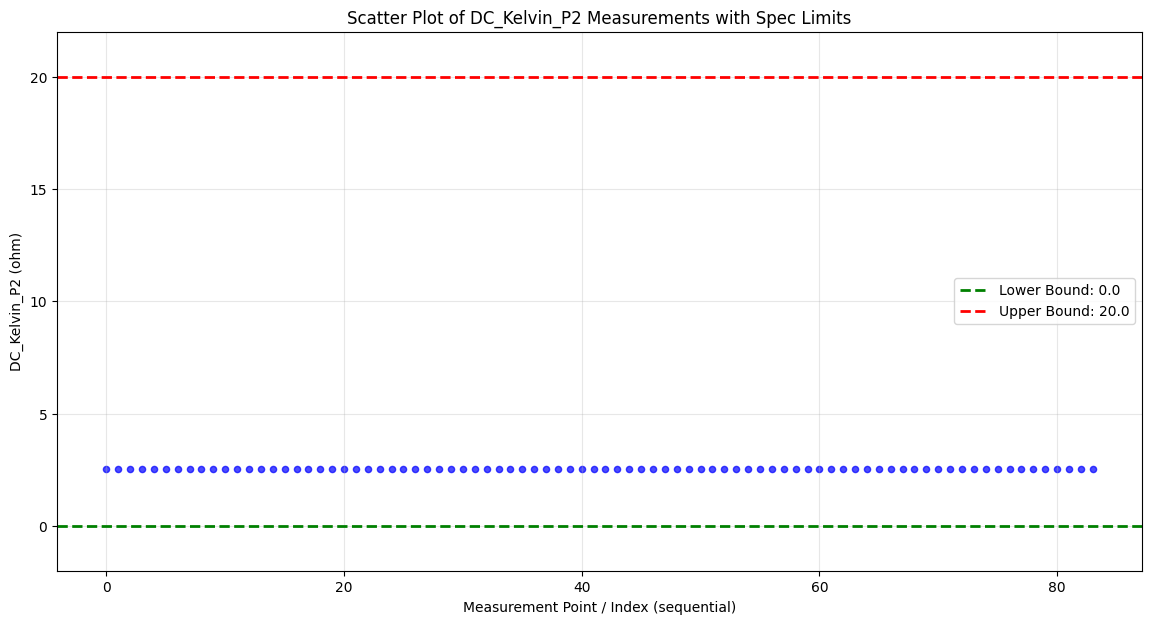

In [27]:
# Extract metadata
unit = s.iloc[0]                    # 'ohm' (string, ignore for plotting but use in label)
lower_bound = float(s.iloc[1])      # 0.0
upper_bound = float(s.iloc[2])      # 20.0

# Extract only the actual measurement data (from index 3 onward) and ensure numeric
data = pd.to_numeric(s.iloc[3:], errors='coerce').dropna()

# Optional: Reset x-axis to start from 0,1,2,... for cleaner sequential view
x = range(len(data))                 # Or use data.index if you want original indices

# Plot
plt.figure(figsize=(14, 7))
plt.scatter(x, data.values, alpha=0.7, color='blue', s=20)  # s=50 for bigger dots

# Add spec limit lines
plt.axhline(y=lower_bound, color='green', linestyle='--', linewidth=2, label=f'Lower Bound: {lower_bound}')
plt.axhline(y=upper_bound, color='red', linestyle='--', linewidth=2, label=f'Upper Bound: {upper_bound}')

# Labels and styling
plt.xlabel('Measurement Point / Index (sequential)')
plt.ylabel(f'DC_Kelvin_P2 ({unit})')
plt.title('Scatter Plot of DC_Kelvin_P2 Measurements with Spec Limits')
plt.legend()
plt.grid(True, alpha=0.3)

# Optional: zoom Y-axis to focus on data cluster (since values are ~2.52 and limits 0-20)
plt.ylim(lower_bound - 2, upper_bound + 2)  # Or tighter: plt.ylim(2.4, 2.6)

# plt.tight_layout()
plt.show()